#### **Finite Differences**

All problems are assigned. The bonus problem is optional.

**1.** We used Taylor series to obtain the first central difference formula for the first derivative. Verify that you obtain the same formula if you fit the data with a polynomial and take a derivative. You have a choice: start with a polynomial or start with Lagrange interpolation functions. Both ways will give you the same result. To make the math simpler, assume the interval is $-h$ to $h$. **Do by hand.**

**2.** Set up the finite difference equations to solve the following uniaxial bar problem using 4 nodes. Use the $\mathcal{O}(h^2)$ finite difference formulas. **Do by hand** for 4 nodes. If the image of the uniaxial bar does not display, view the file uniaxialBar.png.

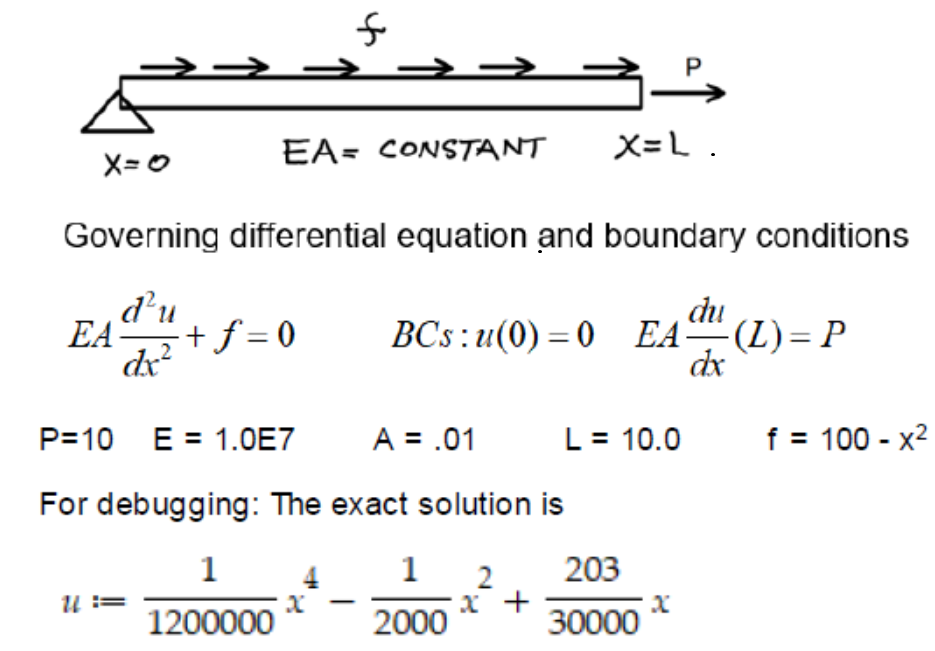

**3.  Bonus 20 points** Write a Python code so that it is easy to use any number of nodes for the uniaxial bar problem in #2. Use your code to analyze the problem using 4, 8, and 16 nodes. Use the 4-node solution you obtained by hand in #2 to validate your code. Also, calculate the exact solution using the governing differential equations. Plot the exact and the finite difference solutions for the displacements and the strain for 4, 8, and 16 nodes.

In [53]:
# Code for bonus question (if you choose to do it)

**4.** Problem 6 in problem set 5.1 on p. 195. **Do by hand.**

**5.** Problem 7 in problem set 5.1 on p. 195. **Do by hand.**

**6.** Use the data from problem 8 in problem set 5.1 on p. 195. Calculate $\frac{{{d^2}f}}{{d{x^2}}}(1)$ using a 2nd order difference formula and Richardson’s extrapolation. **Do by hand.**

**7.** Use the data from problem 9 in problem set 5.1 on p. 195.

Calculate the second derivative at $x=0.2$ several ways **using code**:
* Use the first central difference formula
* Use quadratic polynomial interpolation with only the adjacent points
* Use polynomial interpolation for all the data points
* Use a cubic least squares curve fit of all the data

You may use any Python code to obtain the polynomial and least squares fits (i.e. new custom code, your own custom code from a previous assignment, or functions in NumPy and SciPy).

In [54]:
# Part (a) Using central difference
import numpy as np
import matplotlib.pyplot as plt

x = [0., .1, .2, .3, .4]
y = [0, .078348, .138910, .192916, .244981]

#first central finite difference
h = .1
xval = .2
first_central = (y[1] -2*y[2]+ y[3])/(h**2)
print(f"The second derivative of the data at x = .2 is {first_central}")

The second derivative of the data at x = .2 is -0.6556000000000005


Text(0.5, 1.0, 'Quadratic Interpolation')

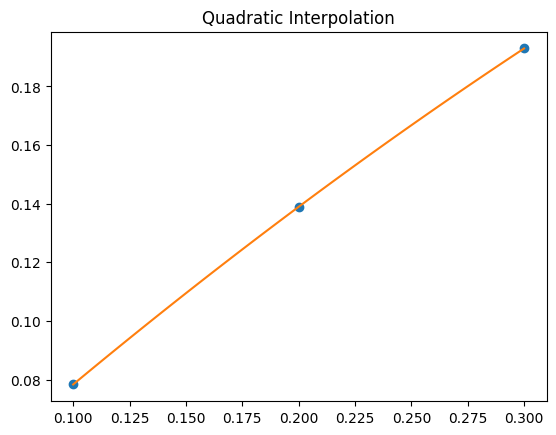

In [55]:
# Part (b) Using quadratic polynomial interpolation

#quadratic polynomial interpolation with adjacent points

x = np.array([.1, .2, .3])
y = np.array([.078348, .138910, .192916])

xVals = np.linspace(.1, .3, 100, dtype=float)

length = np.shape(x)[0]

def Interpolation(xVals, x, y):
    C = np.zeros_like(x)
    H = np.zeros((length, length))

    for rowNum in range(length):
        for colNum in range(length):
            H[rowNum, colNum] = x[rowNum]**colNum

    inverseH = np.linalg.inv(H)

    C = np.matmul(inverseH, y) #calculates C from matrix multiplication of inverseH and yData

    for rowNum in range(length):
        Li = 0 
        for colNum in range(length):
            Li = Li + (xVals**colNum)*C[colNum]

    return Li

yVals = [Interpolation(i, x, y) for i in xVals]

plt.plot(x, y, 'o')
plt.plot(xVals, yVals)
plt.title("Quadratic Interpolation")

Text(0.5, 1.0, 'Polynomial Interpolation')

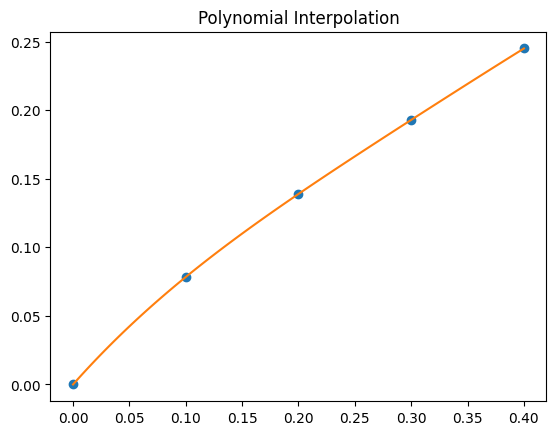

In [56]:
# Part (c) Using polynomial interpolation on all data points

#polynomial interpolation for all points

x = np.array([0., .1, .2, .3, .4])
y = np.array([0, .078348, .138910, .192916, .244981])

xVals = np.linspace(0, .4, 100, dtype=float)

length = np.shape(x)[0]

def Interpolation(xVals, x, y):
    C = np.zeros_like(x)
    H = np.zeros((length, length))

    for rowNum in range(length):
        for colNum in range(length):
            H[rowNum, colNum] = x[rowNum]**colNum

    inverseH = np.linalg.inv(H)

    C = np.matmul(inverseH, y) #calculates C from matrix multiplication of inverseH and yData

    for rowNum in range(length):
        Li = 0 
        for colNum in range(length):
            Li = Li + (xVals**colNum)*C[colNum]

    return Li

yVals = [Interpolation(i, x, y) for i in xVals]

plt.plot(x, y, 'o')
plt.plot(xVals, yVals)
plt.title("Polynomial Interpolation")

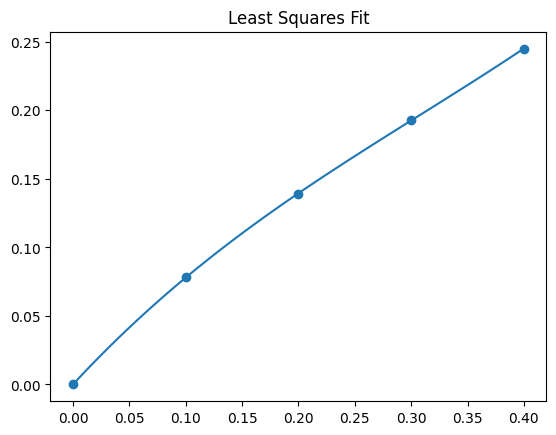

Least Squares Polynomial:
f(x) = 1.3204166666661268x^3 + -1.2145499999996645x^2 + 0.8870058333332821x + 9.450000000092995e-05
f'(x) = 3.9612499999983806x^2 + -2.429099999999329x + 0.8870058333332821
f''(x) = 7.922499999996761x + -2.429099999999329
f''(.2) = 1.0986799999994865


In [57]:
# Part (d) Using least-squares on all data points

def LeastSquaresAndPlot(x, y, m):

    # Create H
    n = len(x)
    H = np.zeros((n, m+1)) #5 x 2, where 2 is the degree + 1

    for j in range(m+1):
        for i in range(n):
            H[i, j]= x[i]**j #actually fills in H matrix

    HTH = H.T @ H
    HTy = H.T @ y
    
    coefficients = np.linalg.solve(HTH, HTy)

    x_vals = np.linspace(x[0], x[-1:], 100)
    y_vals = np.zeros_like(x_vals)  

    for i in range(len(x_vals)):
        summ = 0
        for j in range(m + 1):
            summ += x_vals[i]**j*coefficients[j]
        y_vals[i] = summ

    plt.title("Least Squares Fit")
    plt.scatter(x, y)
    plt.plot(x_vals, y_vals)
    plt.show()

    return coefficients

m = 3
coefficients = LeastSquaresAndPlot(x, y, m)
print(f"Least Squares Polynomial:")
print(f"f(x) = {coefficients[3]}x^3 + {coefficients[2]}x^2 + {coefficients[1]}x + {coefficients[0]}")
print(f"f'(x) = {3 * coefficients[3]}x^2 + {2 * coefficients[2]}x + {coefficients[1]}")
print(f"f''(x) = {6 * coefficients[3]}x + {2 * coefficients[2]}")
print(f"f''(.2) = {(.2 * 6 * coefficients[3]) + (.2 * 2 * coefficients[2])}")